In [1]:
import numpy as np
import scipy as sp
import numpy.random as npr

In [2]:
def softmax(X):
    Y = X - X.max(axis=1, keepdims=True)
    Y = np.exp(Y)
    Y = Y / Y.sum(axis=1, keepdims=True)
    return Y

In [25]:
m = 10000
max_n = 20
C_ii = np.empty(max_n - 1)
C_ij = np.empty(max_n - 1)
for n in xrange(2, max_n + 1):
    X = npr.randn(m, n)
    Y = softmax(X)
    cov_Y = np.cov(Y, rowvar=False)
    C_ii[n-2] = np.diag(cov_Y).mean()
    Z = cov_Y - np.diag(np.diag(cov_Y))
    C_ij[n-2] = Z.sum() / (n*(n-1))

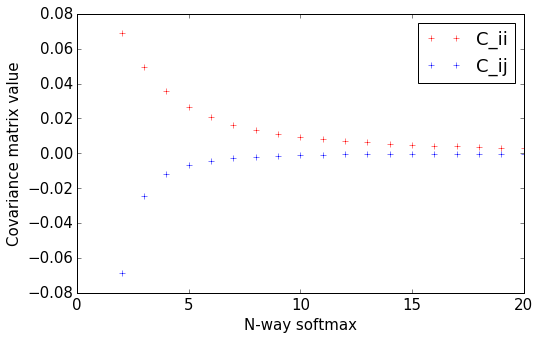

In [40]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams.update({'font.size': 15})
plt.figure(figsize=(8, 5))
plt.plot(np.arange(2,max_n+1), C_ii, 'r+')
plt.plot(np.arange(2,max_n+1), C_ij, 'b+')
plt.xlim([0, max_n])
plt.xlabel('N-way softmax')
plt.ylabel('Covariance matrix value')
plt.legend(['C_ii', 'C_ij'])
plt.savefig('images/softmax_cov.svg')

In [18]:
print C_ii / np.exp(-np.arange(2,21))

[  5.02459763e-01   9.90432351e-01   1.94541632e+00   3.90752641e+00
   8.33370994e+00   1.78833262e+01   3.96221250e+01   9.12617486e+01
   2.05741154e+02   4.91227674e+02   1.16267103e+03   2.74763107e+03
   6.62411397e+03   1.57965244e+04   3.85842528e+04   9.51900812e+04
   2.34254168e+05   5.80979442e+05   1.46180394e+06]
